### Inhaltsverzeichnis
1. A
2. B
3. C
4. D
5. F
6. G

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import validation_curve
 

# Datensäuberung

In [168]:
df = pd.read_csv(r'../Datensätze/breas_cancer_data.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Nachdem wir uns einen ersten Überblick über das Dataset verschafft haben, haben wir es bereinigt und die Label von string zu integer konvertiert. 

In [37]:
count = pd.value_counts(df["diagnosis"])
print(count)

B    357
M    212
Name: diagnosis, dtype: int64


In [38]:
#Bereinigen des Datensets
#Alle NaN werden gedroppt
#Konvertieren der Diagnose Strings in Integer
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
df = df.dropna(axis=1, how='all')

# Aufteilen in Features und Labels
Diagnosis = df.iloc[:,0]
Data = df.iloc[:,1:]

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


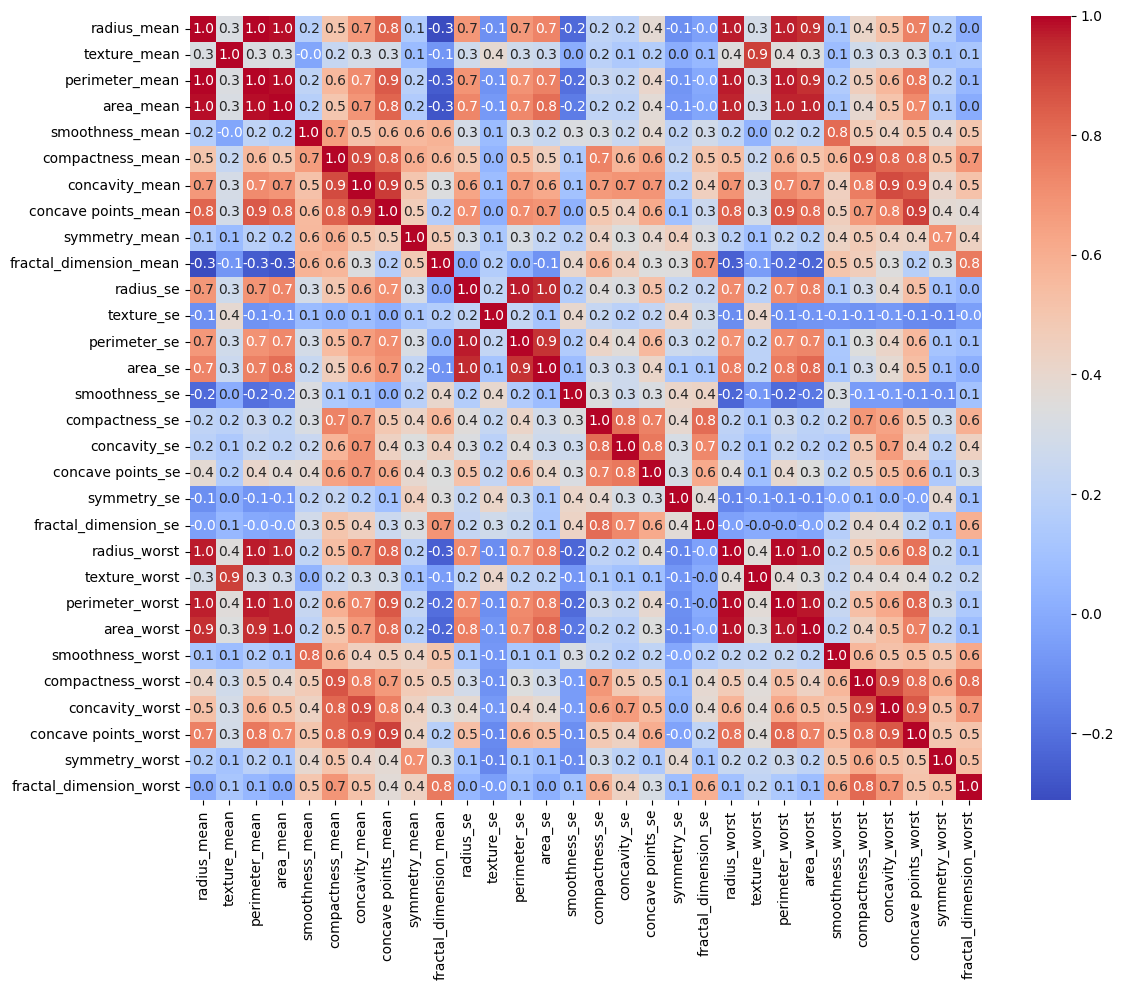

In [33]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.tight_layout()


Nachdem wir uns einen guten Überblick über das Dataset verschafft haben und Schlüsse aus der Korrelation verschiedener Features ziehen konnten. Somit sehen wir, dass radius_mean, perimeter_mean und area_mean eine hohe Korrelation haben. Das bedeutet, dass diese Daten redundant sind und für ein ineffizientes Training sorgen. Wir können redundante Daten entfernen, um ein effizienteres Training zu gewährleisten und die Genauigkeit ggf. zu verbessern.
Wir entfernen also:

Da redundant zu radius_mean:
1. perimeter_mean
2. area_mean

Da redundant zu radius_worst:
1. perimeter_worst
2. area_worst

Da reduntant zu radius_se:
1. area_se
2. perimeter_se

Da redundant zu concave points_worst:
1. concavity_worst
2. compactness_worst

Da redundant zu concave points_mean:
1. concavity_mean
2. compactness_mean

Da kaum Korrelation zu diagnosis:
1. symmetrie_se
2. fractal_dimension_mean
3. fractal_dimension_se
4. smoothness_se
5. texture_se
6. symmetry_mean
7. compactness_se
8. concavity_se
9. concave points_se
10. fractal_dimension_worst

In [34]:
# Liste aller Features, die aus dem Dataset entfernt werden sollen
features_zum_entfernen = [
    'perimeter_mean', 
    'area_mean', 
    'perimeter_worst', 
    'area_worst', 
    'symmetry_se', 
    'fractal_dimension_mean', 
    'fractal_dimension_se',
    'smoothness_se',
    'texture_se',
    'area_se',
    'perimeter_se',
    'concavity_worst',
    'compactness_worst',
    'concavity_mean',
    'compactness_mean',
    'concavity_se',
    'concave points_se',
    'symmetry_mean',
    'compactness_se',
    'fractal_dimension_worst'
]



In [53]:
# Erstellen eines neuen Dataframes, der auf die wichtigsten Features reduziert wurde
df_cleaned = df.drop(columns=features_zum_entfernen)

# Aufteilen in Features und Label
Diagnosis_cleaned = df_cleaned.iloc[:,0]
Data_cleaned = df_cleaned.iloc[:,1:]

df_cleaned.head()


id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
           ..
926424      1
926682      1
926954      1
927241      1
92751       0
Name: diagnosis, Length: 569, dtype: int64


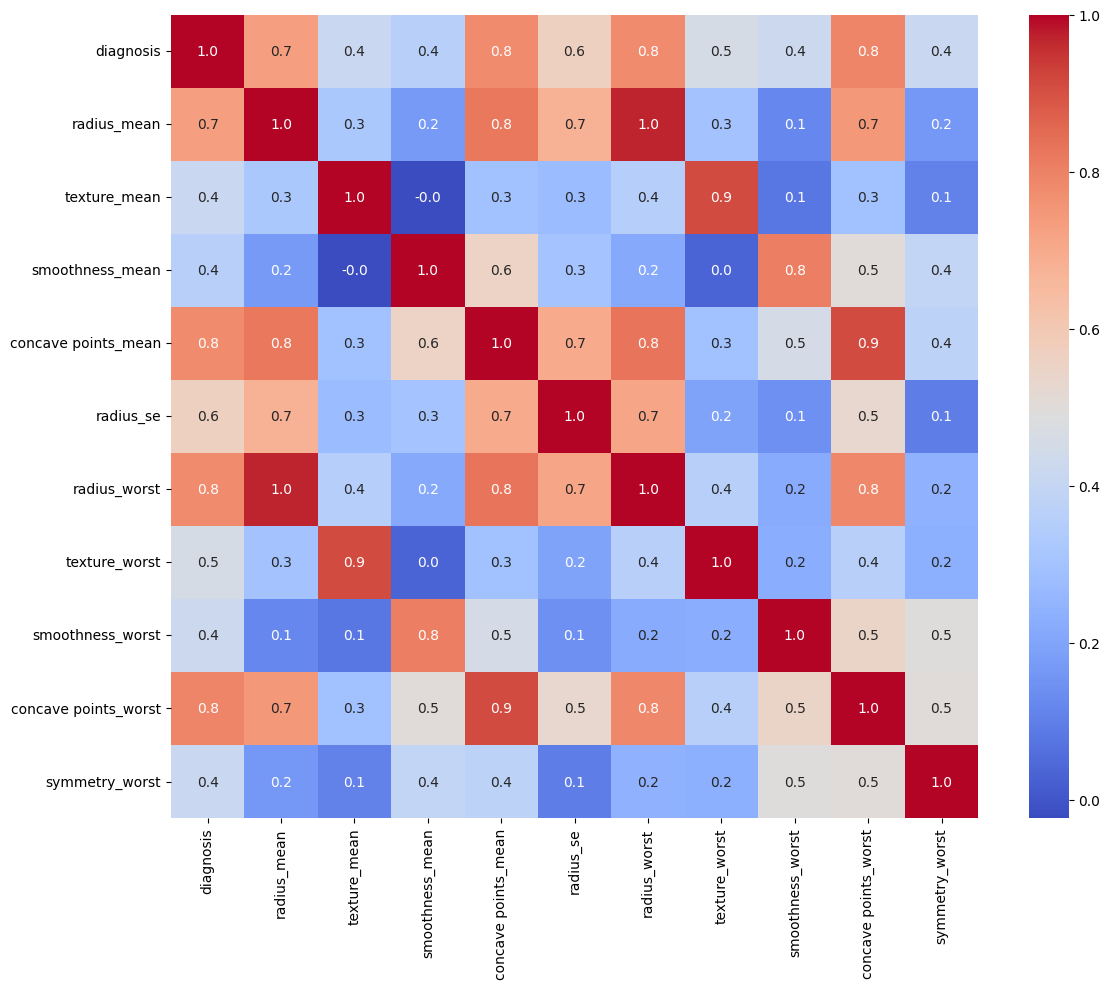

In [21]:
# Plotten einer Korrelationsmatrix des neuen Dataframes
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.tight_layout()

Nun wird überprüft, ob die Genauigkeit durch das Entfernen überflüssiger Daten beeinflusst wurde. Dazu wird die cross_val_score() Funktion auf zwei Modelle angewandt. Einmal wird der Funktion das ursprünglich Dataset übergeben und das andere Mal das reduzierte Dataset. Als Ausgabe erhalten wir die Durchschnittsgenauigkeit und können Schlüsse über den Erfolg einer Datenreduktion ziehen.

In [9]:
RF_Model_c_ohne_tuning = RandomForestClassifier(random_state=42)
RF_Model = RandomForestClassifier(random_state=42)


# 5-fache Cross-Validation auf den bereinigten Daten

cv_scores_c_ohne_tuning = cross_val_score(RF_Model, Data_cleaned, Diagnosis_cleaned, cv=200, scoring='accuracy')
cv_scores = cross_val_score(RF_Model, Data, Diagnosis, cv=200, scoring='accuracy')

#print(cv_scores_c)

# Ausgabe der durchschnittlichen Genauigkeit über alle Folds

print(f"Durchschnittliche Genauigkeit für Cleaned ohne Tuning: {cv_scores_c_ohne_tuning.mean()}")
print(f"Durchschnittliche Genauigkeit für normal: {cv_scores.mean()}")


Durchschnittliche Genauigkeit für Cleaned ohne Tuning: 0.9691666666666666
Durchschnittliche Genauigkeit für normal: 0.9575


Alleine durch das Entfernen redundanter und irrelevanter Daten, konnte die Genauigkeit über 1% gesteigert werden. Auch wenn das Ergebnis der Intuition widerspricht, dass mehr Daten ein besseres Training ermöglichen, macht das Ergebnis durchaus Sinn.
Auch wenn RandomForests nicht unbedingt anfällig für Overfitting sind, sind sie auch nicht Imun. Außerdem wird durch das Entfernen der irrelevanten Daten das Rauschen des Modells verringert.
Somit kommen wir zum Schluss, dass wir für das Training das reduzierte Dataset nutzen.

# RandomForest und Parameter

Nun ist an der Zeit einen RandomForest zu trainieren. Wir trainieren ihn erstmal mit den standart Parametern und plotten ihn anschließend, um uns über die Struktur eines solchen Baumes Überblick zu verschaffen. Anschließend konzentrieren wir uns auf die Optimierung des Classifiers durch Hyperparameter-Tuning. 

In [201]:
# Aufteilen der Daten in Test-, Val- und Trainingsdaten
X_train, X_test, y_train, y_test = train_test_split(Data_cleaned, Diagnosis_cleaned, random_state=42, test_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

[Text(0.5357142857142857, 0.9375, 'X[8] <= 0.129\ngini = 0.482\nsamples = 195\nvalue = [189, 129]\nclass = y[0]'),
 Text(0.2857142857142857, 0.8125, 'X[4] <= 0.596\ngini = 0.103\nsamples = 121\nvalue = [174, 10]\nclass = y[0]'),
 Text(0.21428571428571427, 0.6875, 'X[9] <= 0.414\ngini = 0.044\nsamples = 119\nvalue = [174, 4]\nclass = y[0]'),
 Text(0.14285714285714285, 0.5625, 'X[8] <= 0.111\ngini = 0.033\nsamples = 118\nvalue = [174, 3]\nclass = y[0]'),
 Text(0.07142857142857142, 0.4375, 'gini = 0.0\nsamples = 108\nvalue = [165, 0]\nclass = y[0]'),
 Text(0.21428571428571427, 0.4375, 'X[6] <= 27.38\ngini = 0.375\nsamples = 10\nvalue = [9, 3]\nclass = y[0]'),
 Text(0.14285714285714285, 0.3125, 'X[8] <= 0.125\ngini = 0.18\nsamples = 9\nvalue = [9, 1]\nclass = y[0]'),
 Text(0.07142857142857142, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [7, 0]\nclass = y[0]'),
 Text(0.21428571428571427, 0.1875, 'X[0] <= 14.33\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = y[0]'),
 Text(0.142857142857142

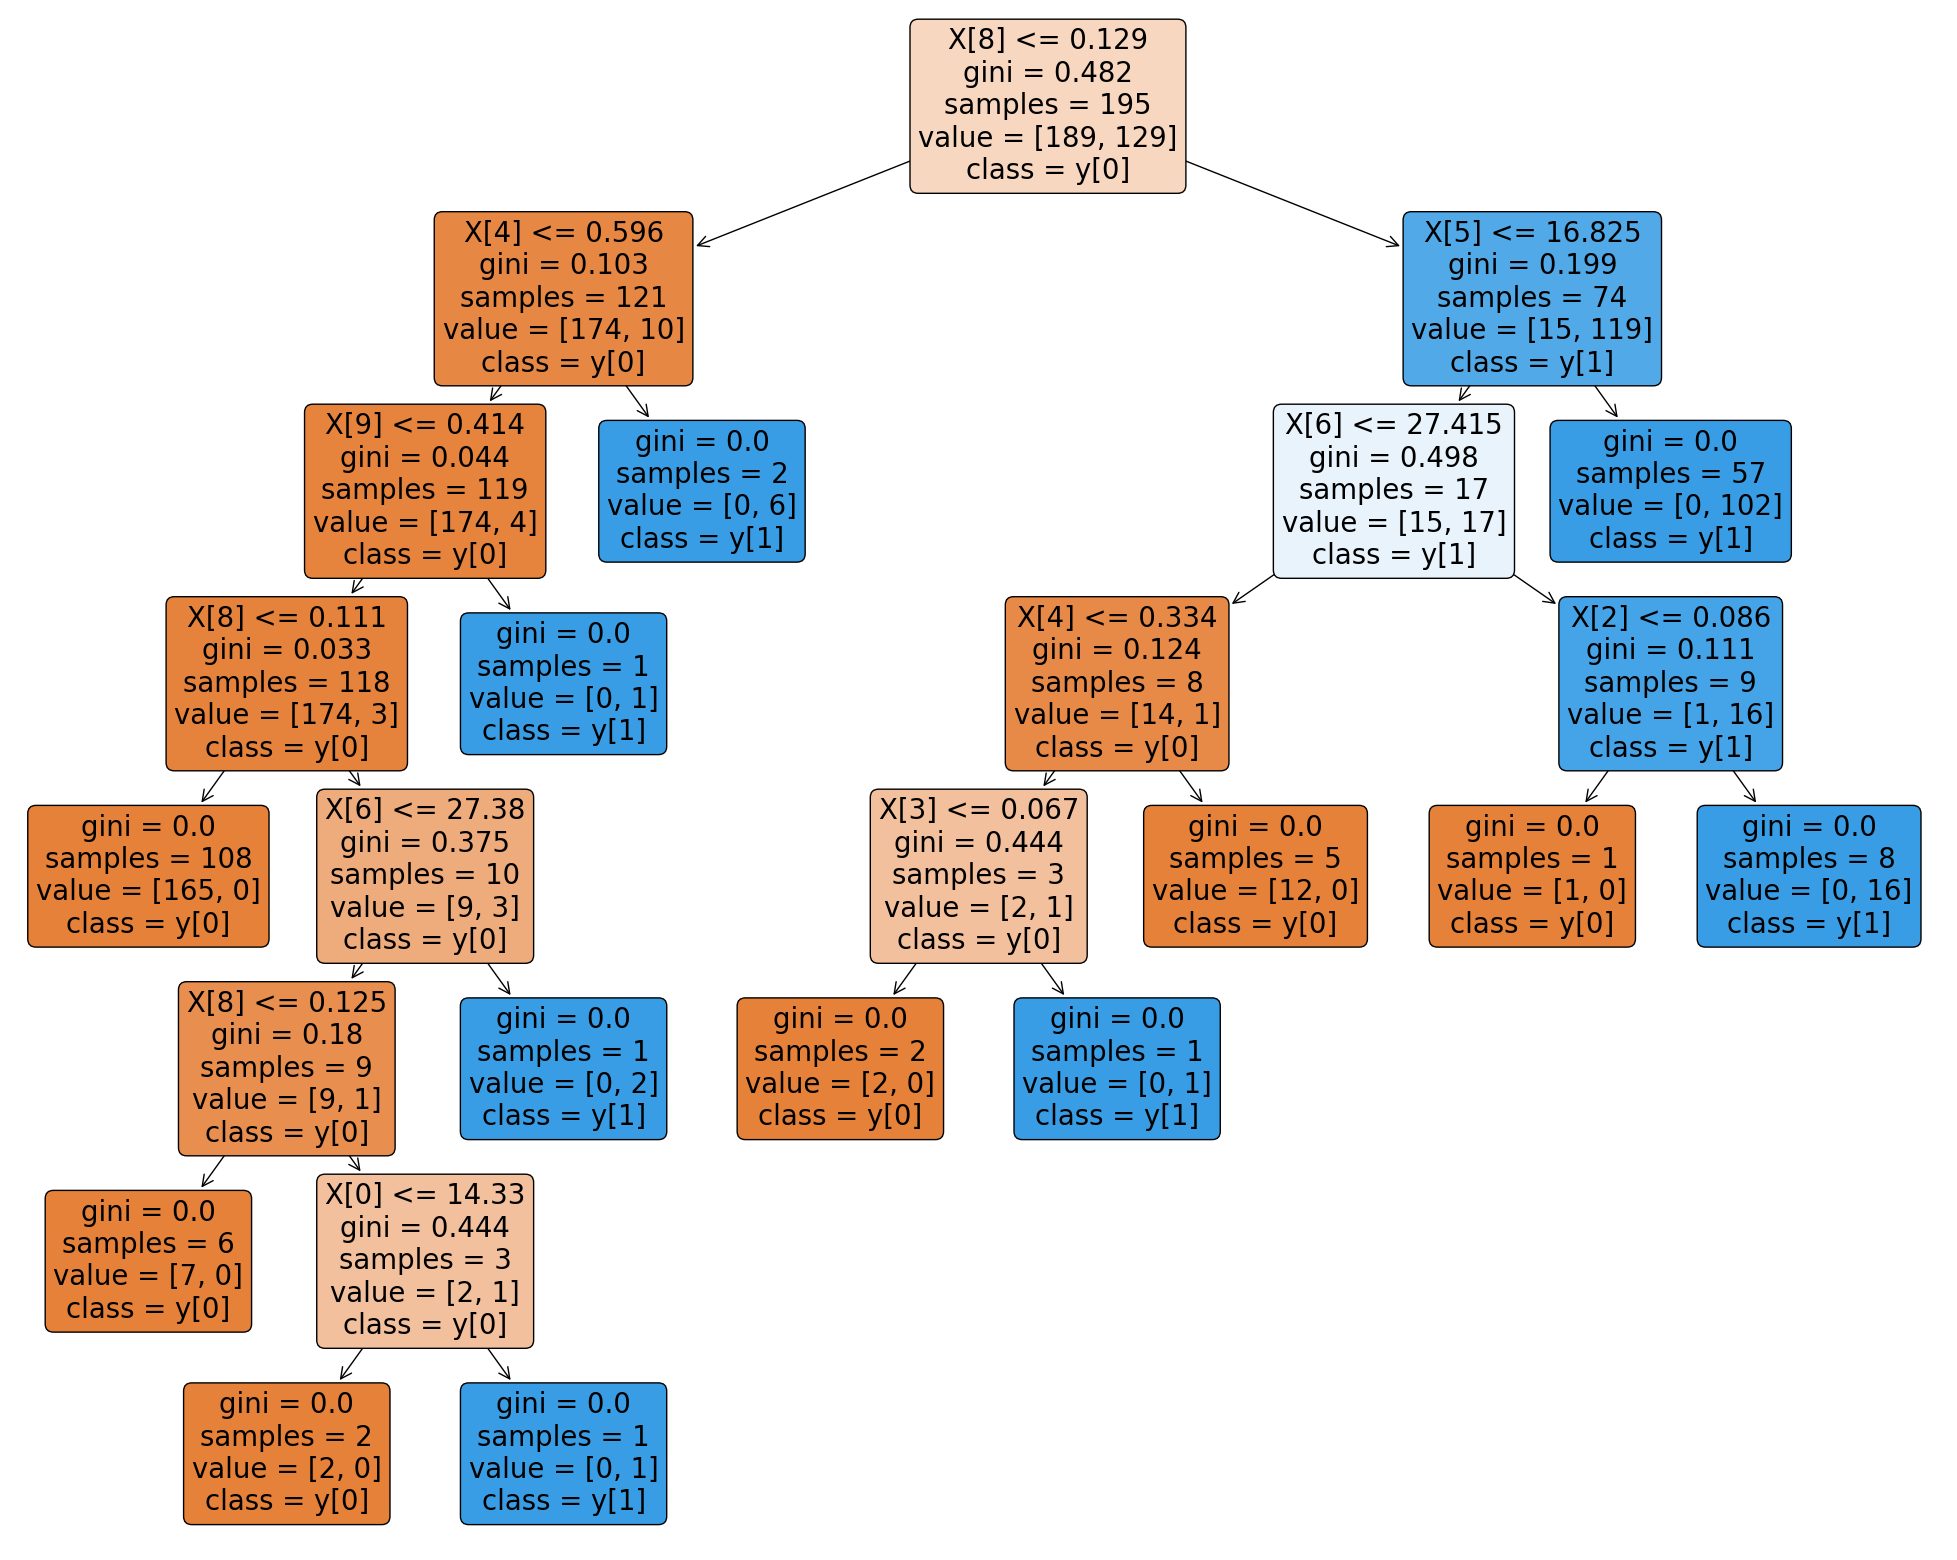

In [128]:
# Trainieren des Modells
RF_Model_c = RandomForestClassifier()
RF_Model_c.fit(X_train, y_train)

# Erzeuge eine Figur mit einer geeigneten Größe
fig = plt.figure(figsize=(25, 20))
plt.tight_layout()

# Visualisiere den Entscheidungsbaum
tree.plot_tree(RF_Model_c.estimators_[1], filled = True , rounded = True, class_names = True)


Es ist an der Zeit sich mit den bereits genannten Hyperparametern zu beschäftigen. Doch welche Parameter existieren überhaupt?

In [12]:
print(RF_Model_c.get_params())

NameError: name 'RF_Model_c' is not defined

## Forest Parameter

## Ausprobieren :

Im folgenden werden wir einfach ein paar Hyperparameter verstellen und sehen was passiert.
Die Hyperparameter die wir verstellen sind : Bootstrap, Max_depth, Max_samples und n_estimators

In [105]:
RF_Testing = RandomForestClassifier(random_state = 42)

RF_Testing.fit(X_train, y_train)
y_pred = RF_Testing.predict(X_valid)
RF_Testing_Accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {RF_Testing_Accuracy}")

Accuracy: 0.95


Wie man unschwer erkennen kann ist es nicht von Vorteil die Hyperparameter zu Raten  

### GridSearch CV

Wie bereits erwähnt, ist das Raten von Hyperparametern ineffizient und führt oft zu suboptimalen Ergebnissen. Daher verwenden wir GridSearchCV, ein Werkzeug aus der scikit-learn-Bibliothek. Mit GridSearchCV definieren wir ein Gitter möglicher Hyperparameter-Kombinationen, die systematisch getestet werden.

Hierzu definieren wir zu Anfang dei Hyperparameter, welche wir verändern wollen.

In [74]:
n_estimators = list(range(10, 200, 20))
# Max_features steuert, wie viele Features zufällig ausgewählt werden sollen, um den besten Split am Knoten zu bekommen
max_features = ['sqrt', 'log2']
# Max_depth ist die maximale Tiefe / Ebene
max_depth = [2, 4]
# min_sample_split bestimmt, wann der Knoten nicht weiter aufgeteilt wird
min_sample_split = [2, 5]
# min_sample_leaf bestimmt die minimale Anzahl an Proben, die in einem Blattknoten verbleiben müssen
min_sample_leaf = list(range(1, 100, 3))
# Bootstrap gibt an, ob Bootstrap-Stichproben verwendet werden sollen
bootstrap = [False]
# Criterion gibt das Kriterium für den besten Split an
criterion = ['gini', 'entropy']
# Class_weight hilft bei der Behandlung von Ungleichgewichten in den Daten
class_weight = ['balanced']
# Max_leaf_nodes begrenzt die Anzahl der Blätter im Baum
max_leaf_nodes = [None, 10, 20, 30, 40]  # None bedeutet unbegrenzt


## TEXT FÜR DAS PARAM GRID!

In [75]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'bootstrap': bootstrap,
    'min_samples_leaf': min_sample_leaf,
    'min_samples_split': min_sample_split,
    'criterion': criterion,
    'class_weight': class_weight,
    'max_leaf_nodes': max_leaf_nodes  # Neue Ergänzung
}


## ..............

In [76]:
Rf_GridSearch = RandomForestClassifier()

Rf_Grid = GridSearchCV(estimator = Rf_GridSearch, param_grid = param_grid, cv = 5, verbose = 2, n_jobs = 4)

Rf_Grid.fit(X_train, y_train)

Best_Parameter  = Rf_Grid.best_params_
print(Best_Parameter)





Fitting 5 folds for each of 26400 candidates, totalling 132000 fits
{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}


Nun werden wir das Modeell mit den gefundende Parametern testen

In [124]:
Best_Parameter_test = {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 110}

In [164]:
# Versuch, Random Forest mit den getunten Parametern zu erstellen
RF_Tune = RandomForestClassifier(**Best_Parameter_test)

RF_Tune.fit(X_train, y_train)
y_pred_RF_Tune = RF_Tune.predict(X_valid)
RF_Tune_Accuracy = accuracy_score(y_valid, y_pred_RF_Tune)
print(f"Accuracy: {RF_Tune_Accuracy}")

Accuracy: 0.975


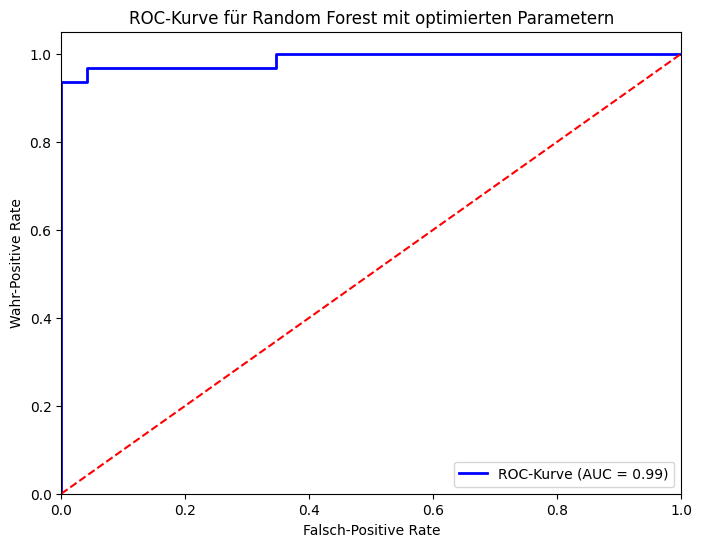

In [111]:
# Vorhersage der Wahrscheinlichkeiten für die positive Klasse
y_probs_RF_Tune = RF_Tune.predict_proba(X_valid)[:, 1]  # Wahrscheinlichkeit für die positive Klasse

# Berechnung der ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_valid, y_probs_RF_Tune)
roc_auc = auc(fpr, tpr)

# Plot der ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-Kurve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Zufallsprognose
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsch-Positive Rate')
plt.ylabel('Wahr-Positive Rate')
plt.title('ROC-Kurve für Random Forest mit optimierten Parametern')
plt.legend(loc='lower right')
plt.show()

## Visualisierung von Hyperparameter Tuning

In [89]:
Accuracy_Estimators = []

for n in range(2, 500, 3):
    RF_Estimators = RandomForestClassifier(
        bootstrap=False,
        class_weight='balanced',
        criterion='entropy',
        max_depth=4,
        max_features='sqrt',
        min_samples_leaf=5,
        n_estimators=n
    )
    RF_Estimators.fit(X_train, y_train)
    RF_Estimators_predictions = RF_Estimators.predict(X_test)
    RF_Estimators_Accuracy = accuracy_score(y_test, RF_Estimators_predictions)
    Accuracy_Estimators.append(RF_Estimators_Accuracy)


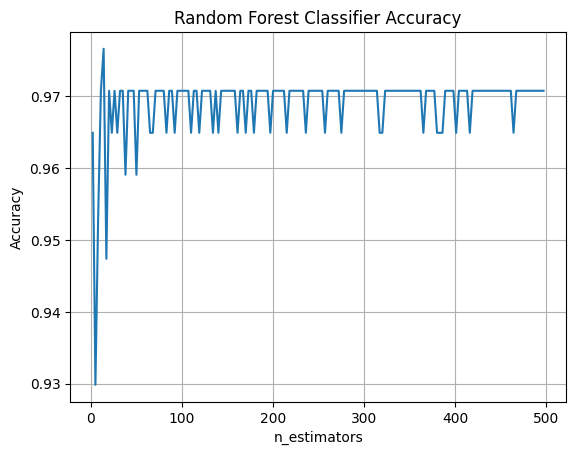

In [90]:
# Plotten der Ergebnisse
plt.plot(range(2, 500, 3), Accuracy_Estimators)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.grid()


## N_Estimators keine großen Auswirkungen

## ANDERE

In [43]:
Accuracy_RF_Sample_Leaf = []

for n in range(1, 500):
    # Erstellen Sie den Klassifikator
    RF_Sample_Leaf = RandomForestClassifier(min_samples_leaf = n)
    RF_Sample_Leaf.fit(X_train, y_train)
    RF_Sample_Leaf_Predictions = RF_Sample_Leaf.predict(X_valid)
    RF_Sample_Leaf_Acc = accuracy_score ( y_valid, RF_Sample_Leaf_Predictions)


    Accuracy_RF_Sample_Leaf.append(RF_Sample_Leaf_Acc)




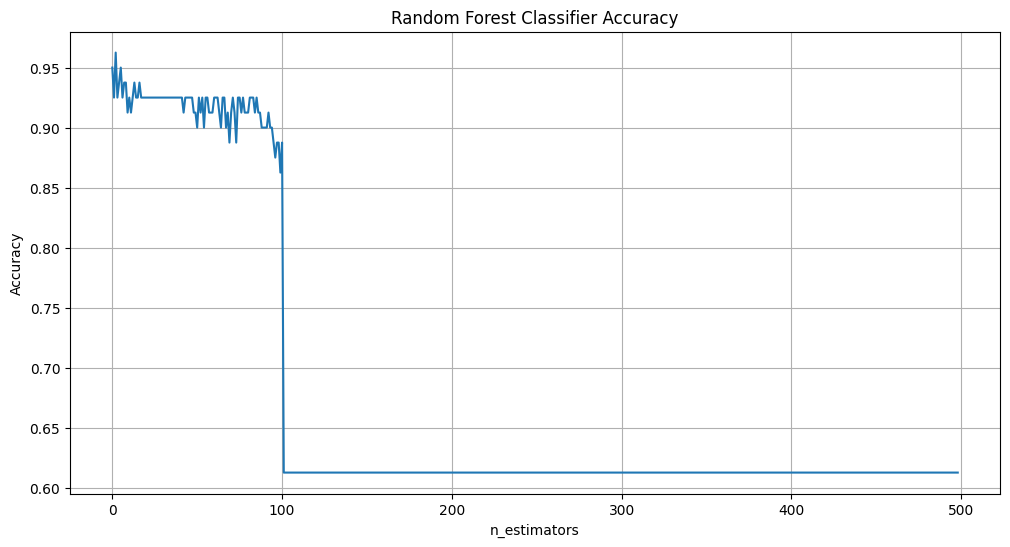

In [44]:
plt.figure(figsize=(12, 6)) 

plt.plot(Accuracy_RF_Sample_Leaf)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.grid()


In [45]:
RF_Sqrt = RandomForestClassifier()
RF_Log2 = RandomForestClassifier()

Finally, we will observe the effect of the max_features hyperparameter. This resembles the number of maximum features provided to each tree in a random forest.

We know that random forest chooses some random samples from the features to find the best split. Let’s see how varying this parameter can affect our random forest model’s performance.



In [46]:
Accuracy_RF_Max_Features = []

for n in range(1, 300):
    # Erstellen Sie den Klassifikator
    RF_Max_Features = RandomForestClassifier(max_features = n)
    RF_Max_Features.fit(X_train, y_train)
    RF_Max_Features_Predictions = RF_Max_Features.predict(X_valid)
    RF_Max_Features_Acc = accuracy_score ( y_valid, RF_Max_Features_Predictions)


    Accuracy_RF_Max_Features.append(RF_Max_Features_Acc)


print(Accuracy_RF_Max_Features)

[0.95, 0.9625, 0.95, 0.95, 0.9625, 0.9625, 0.9375, 0.95, 0.9375, 0.95, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.925, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.925, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.925, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.925, 0.95, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.95, 0.9375, 0.9375, 0.9375, 0.925, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.925, 0.9375, 0.9375, 0.95, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.95, 0.9375, 0.9375, 0.9375, 0.925, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.95, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.

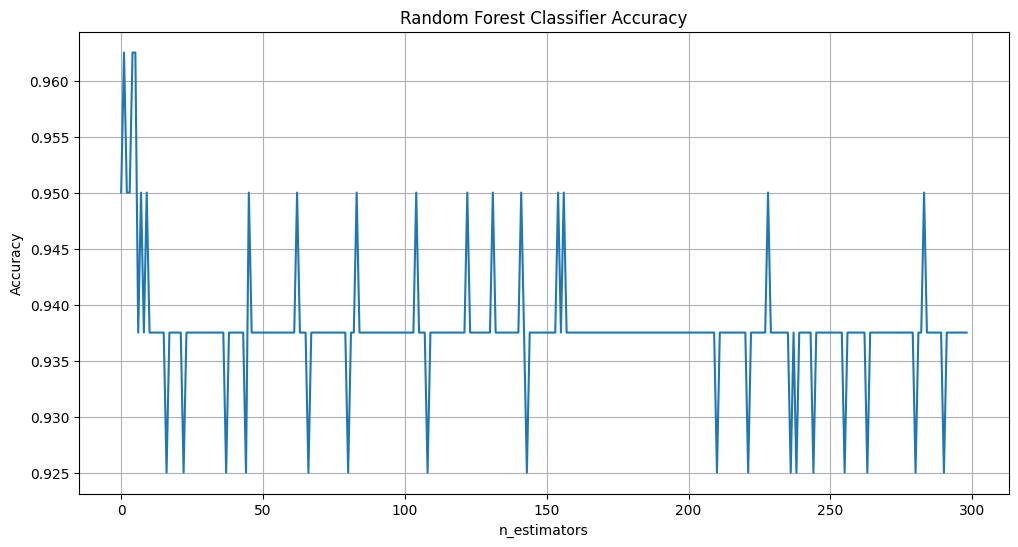

In [47]:
plt.figure(figsize=(12, 6)) 

plt.plot(Accuracy_RF_Max_Features)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.grid()


In [48]:
# Liste zur Speicherung der Accuracy für verschiedene max_depth-Werte
Accuracy_RF_Max_Depth = []

# Schleife für max_depth-Werte von 1 bis 300
for n in range(1, 300):
    # Erstellen des Klassifikators mit variablem max_depth
    RF_Max_Depth = RandomForestClassifier(max_depth=n)
    
    # Modelltraining
    RF_Max_Depth.fit(X_train, y_train)
    
    # Vorhersagen auf den Testdaten
    RF_Max_Depth_Predictions = RF_Max_Depth.predict(X_valid)
    
    # Berechnung der Accuracy
    RF_Max_Depth_Acc = accuracy_score(y_valid, RF_Max_Depth_Predictions)
    
    # Speichern der Accuracy für den aktuellen max_depth-Wert
    Accuracy_RF_Max_Depth.append(RF_Max_Depth_Acc)



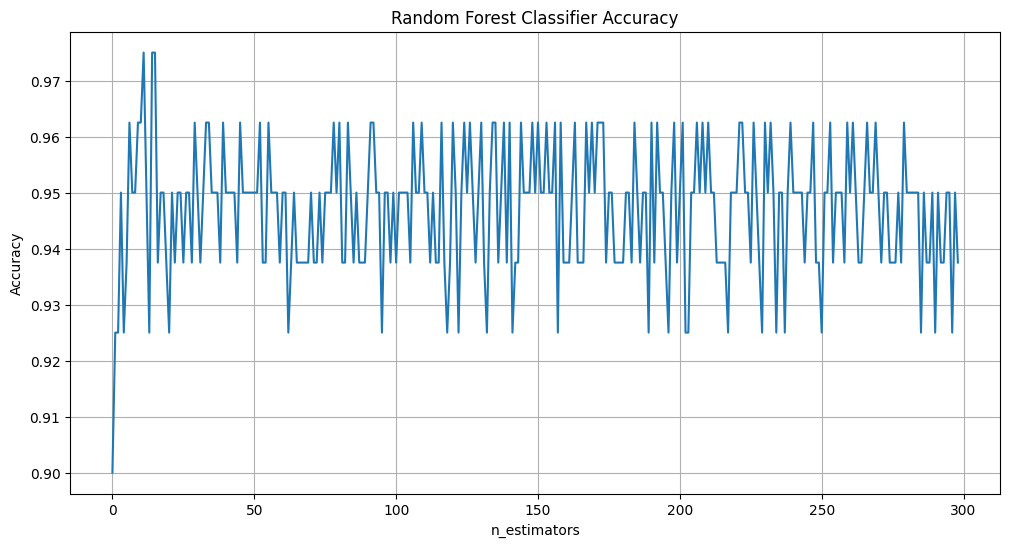

In [50]:
plt.figure(figsize=(12, 6)) 
plt.plot(Accuracy_RF_Max_Depth)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.grid()


In [157]:
Best_Parameter_test = {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 110}


In [206]:
# TODO: Das Training ist hier deutlich schneller als oben ohne die Parameter. Warhscheinlich liegt das an der Größe, Tiefe und Anzahl der Bäume. 
#       Auf jeden Fall die Funktionen überprüfen, ob die besten Parameter korrekt ausgegeben werden


Rf_Val = RandomForestClassifier(**Best_Parameter_test,random_state = 12)
RF_Model_c = RandomForestClassifier(random_state=42)
RF_Model_mit_tuning = RandomForestClassifier(random_state=42)

#cv_scores_c = cross_val_score(RF_Model_c, Data_cleaned, Diagnosis_cleaned, cv=200, scoring='accuracy')
#cv_scores_tuned = cross_val_score(RF_Model_mit_tuning, Data, Diagnosis, cv=200, scoring='accuracy')

print(f"Durchschnittliche Genauigkeit für Cleaned mit Tuning: {cv_scores_c.mean()}")
print(f"Durchschnittliche Genauigkeit für normal mit tuning: {cv_scores_tuned.mean()}")

Rf_Val.fit(X_train, y_train)

Rf_Val_pred = Rf_Val.predict(X_valid)

Rf_Val_Accuracy = accuracy_score(y_valid,Rf_Val_pred)

print(Rf_Val_Accuracy)













Durchschnittliche Genauigkeit für Cleaned mit Tuning: 0.9691666666666666
Durchschnittliche Genauigkeit für normal mit tuning: 0.9575
0.975


In [207]:
y_pred_test = Rf_Val.predict(X_test)
Accur = accuracy_score(y_test,y_pred_test)
print(Accur)

0.9707602339181286


In [208]:
# Annahme: X_test und y_test sind bereits definiert
Rf_untuned = RandomForestClassifier(random_state = 12)

# Trainiere das Modell
Rf_untuned.fit(X_train, y_train)

# Vorhersagen auf dem Validierungsdatensatz
Rf_untuned_Predict = Rf_untuned.predict(X_valid)

# Berechnung der Genauigkeit auf dem Validierungsdatensatz
Rf_untuned_Accuracy = accuracy_score(y_valid, Rf_untuned_Predict)
print(f"Accuracy auf Validierungsdaten: {Rf_untuned_Accuracy:.4f}")

# Vorhersagen auf dem Testdatensatz
Rf_untuned_Predict_test = Rf_untuned.predict(X_test)

# Berechnung der Genauigkeit auf dem Testdatensatz
Rf_untuned_Accuracy_test = accuracy_score(y_test, Rf_untuned_Predict_test)
print(f"Accuracy auf Testdaten: {Rf_untuned_Accuracy_test:.4f}")


Accuracy auf Validierungsdaten: 0.9375
Accuracy auf Testdaten: 0.9649


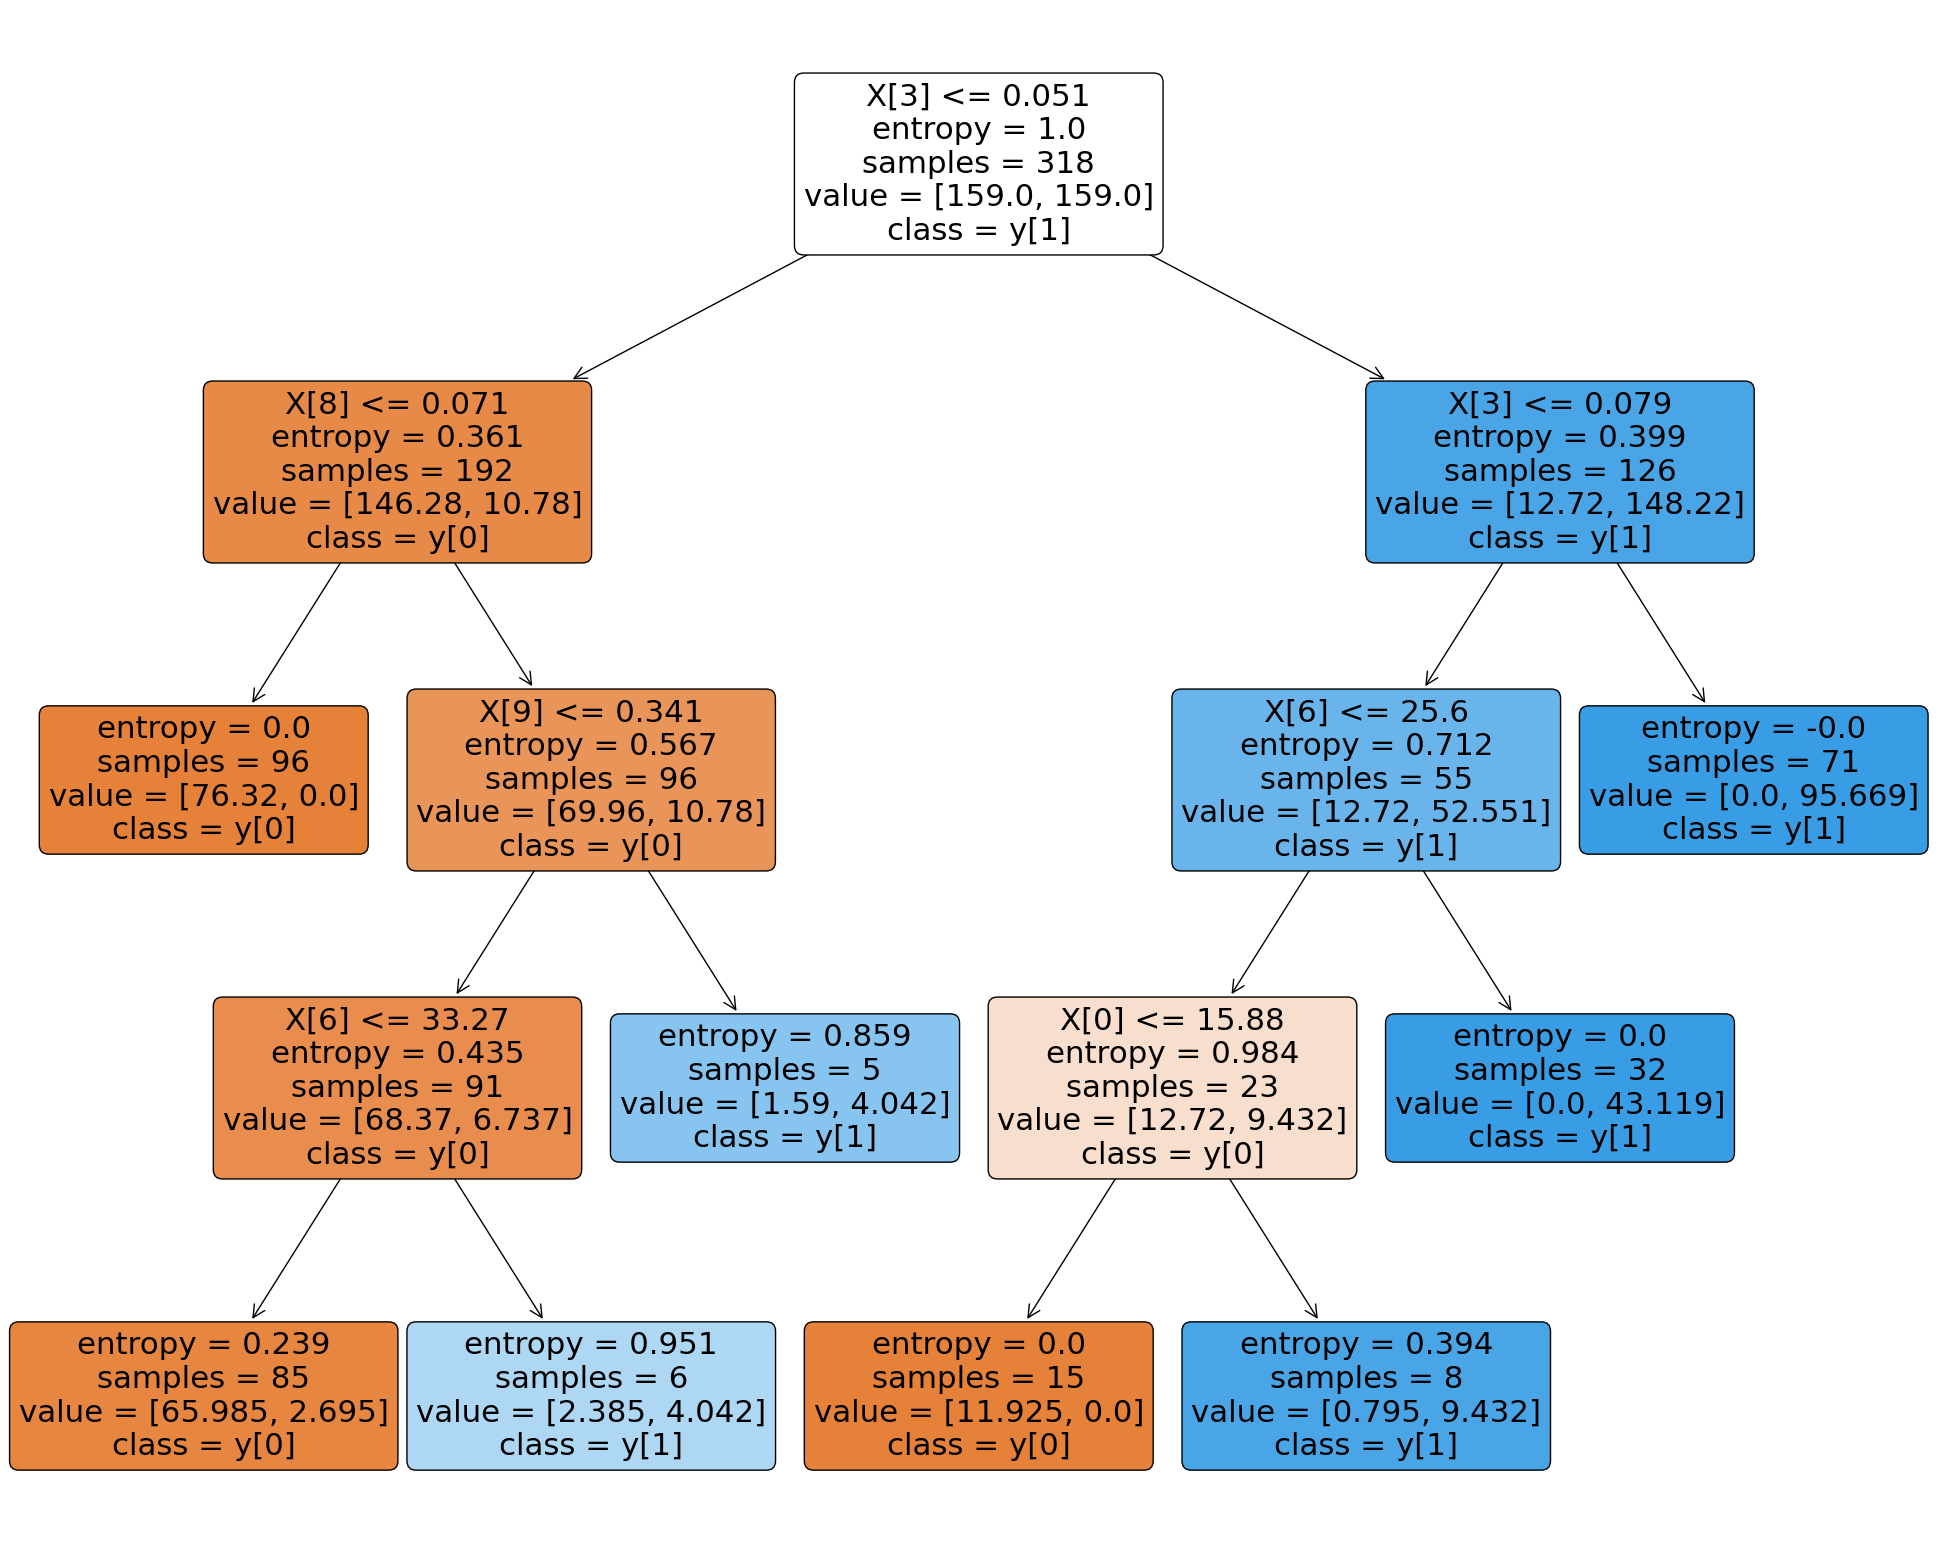

In [162]:

fig = plt.figure(figsize=(25, 20))
plt.tight_layout()

# Visualisiere den Entscheidungsbaum
tree.plot_tree(Rf_Val.estimators_[1], filled = True , rounded = True, class_names = True)
plt.savefig('books_read.png')

Wieso wählen wir die Parameter :

Bootstrap setzen wir auf False, da wir duruch eine Cross Validation, das Dataset eh durchmischen und dadurch dass wir ein sehr gutes dataset haben       verschlechtert das Datenset  sich durhc eine zufällige Anordnung 

Class weight balanced :Das Festlegen des Klassengewichts auf „balanced“ weist der Minderheitsklasse automatisch ein höheres Gewicht und der                                     Mehrheitsklasse ein niedrigeres Gewicht zu, während das Modell trainiert wird. Hier ist der bösartige Tumor viel seltener als der                        gutartiger balanced_subsample macht kein Sinn da wir bootstrap auf False gesetzt haben, None macht auch kein SInn da die Anzahl                          von Diagnosis zu unteschiedlich sind

Criterion: Benutzen wir Entropy, da es besser ist bei unausgeglicheneren Daten

max_features : hier benutzen wir den Standart sqrt, jener nimmt einfach die Quadratwurzel aus allen Features         

max_depth : Hier nutzen wir den wwert 4, wobei auch höhere WErte die selbe Accuracy hätten, jedoch besteht die Gefahr, dass durch eine höher depth                   Overfitting entsteht, darüber hinaus ist die Komplexität zu hoch und dadurch ist es schwer sie zu interpretieren



obb_score: Diesen Parameter können wir gleich auf "False" setzen, da wir eine Cross-Validierung verwenden werden
verbose: Hier können wir eine "0" übergeben, da wir keine Updates zum Training haben möchten

max_leaf_nodes: Gibt die maximale Anzahl an Blättern an, da jedoch unsere depth bereits festgelegt ist benötigen wir das nicht


min_weight_fraction_leaf

In [83]:
Best_Parameter_test = {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 110}

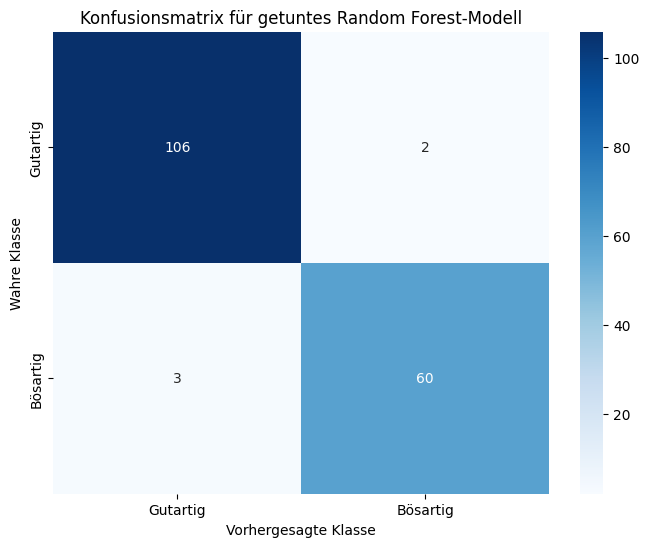

In [209]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Vorhersagen für das getunte Random Forest-Modell
y_pred_RF_Tune = RF_Tune.predict(X_test)

# Konfusionsmatrix berechnen
conf_matrix_tuned = confusion_matrix(y_test, y_pred_RF_Tune)

# Heatmap für die Konfusionsmatrix erstellen
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Gutartig', 'Bösartig'], 
            yticklabels=['Gutartig', 'Bösartig'])
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Wahre Klasse')
plt.title('Konfusionsmatrix für getuntes Random Forest-Modell')
plt.show()


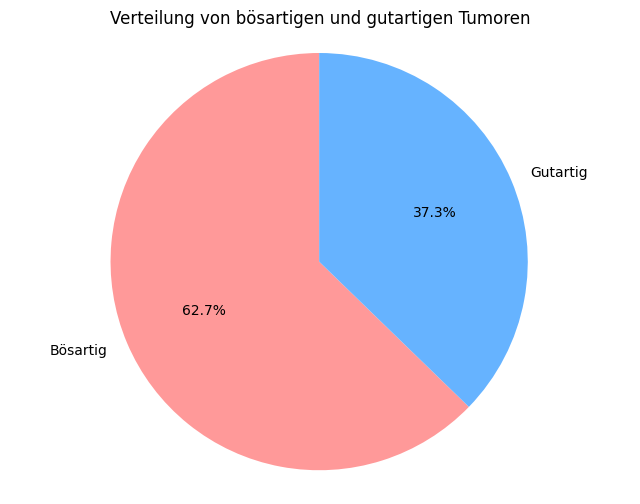

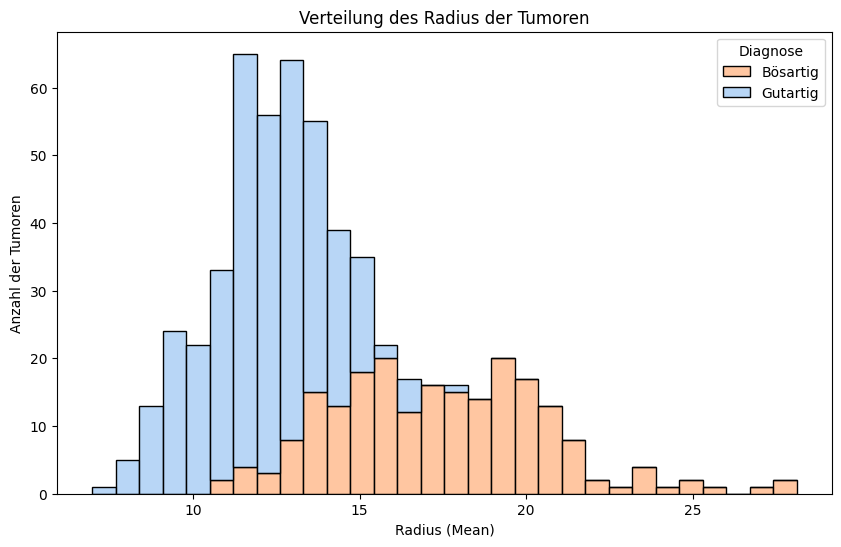

In [86]:
# Kreisdiagramm für die Verteilung von bösartigen und gutartigen Tumoren
class_counts = df['diagnosis'].value_counts()  # Angenommen, die Zielvariable heißt 'diagnosis'

# Erstellen Sie benutzerdefinierte Labels für das Diagramm
labels = ['Bösartig', 'Gutartig']  # Hier die gewünschten Labels

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Verteilung von bösartigen und gutartigen Tumoren')
plt.axis('equal')  # Gleichmäßige Achsen für einen perfekten Kreis
plt.show()

# Histogramm für das Merkmal 'radius_mean'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='radius_mean', hue='diagnosis', multiple='stack', bins=30, palette='pastel')
plt.title('Verteilung des Radius der Tumoren')
plt.xlabel('Radius (Mean)')
plt.ylabel('Anzahl der Tumoren')
plt.legend(title='Diagnose', labels=['Bösartig', 'Gutartig'])
plt.show()

In [67]:
Data_cleaned.head()

,radius_mean,texture_mean,smoothness_mean,concave points_mean,radius_se,radius_worst,texture_worst,smoothness_worst,concave points_worst,symmetry_worst
id,,,,,,,,,,
842302,17.99,10.38,0.11840,0.14710,1.0950,25.38,17.33,0.1622,0.2654,0.4601
842517,20.57,17.77,0.08474,0.07017,0.5435,24.99,23.41,0.1238,0.1860,0.2750
84300903,19.69,21.25,0.10960,0.12790,0.7456,23.57,25.53,0.1444,0.2430,0.3613
84348301,11.42,20.38,0.14250,0.10520,0.4956,14.91,26.50,0.2098,0.2575,0.6638
84358402,20.29,14.34,0.10030,0.10430,0.7572,22.54,16.67,0.1374,0.1625,0.2364


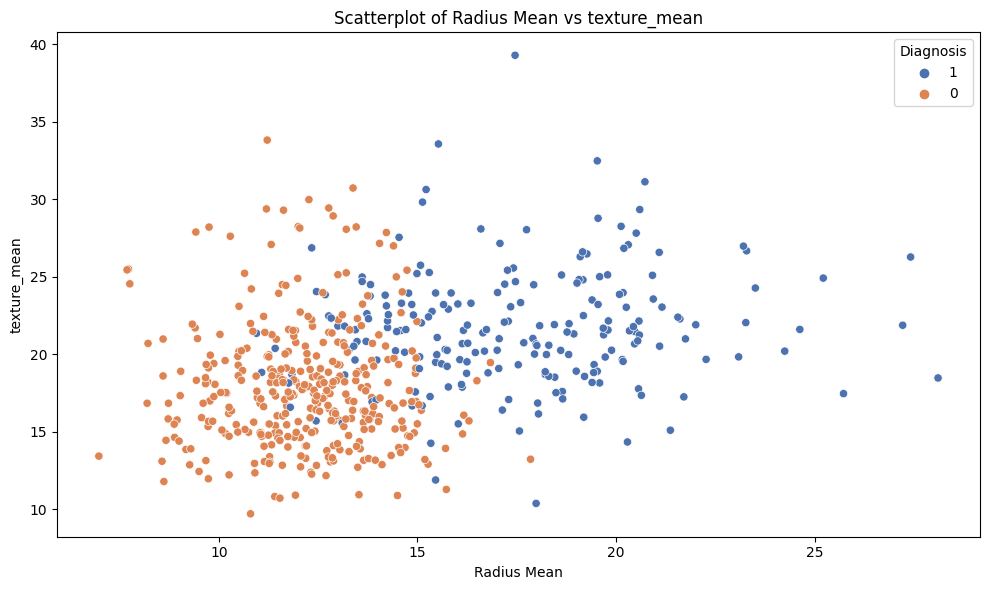

In [84]:
# Scatterplot für radius_mean



plt.figure(figsize=(10, 6))
sns.scatterplot(x=Data_cleaned["radius_mean"], y=Data_cleaned["texture_mean"], hue=Diagnosis_cleaned, palette="deep")

# Achsenbeschriftungen und Titel
plt.title('Scatterplot of Radius Mean vs texture_mean')
plt.xlabel('Radius Mean')
plt.ylabel('texture_mean')

# Legende hinzufügen
plt.legend(title='Diagnosis')

# Plot anzeigen
plt.tight_layout()


plt.savefig("Test")



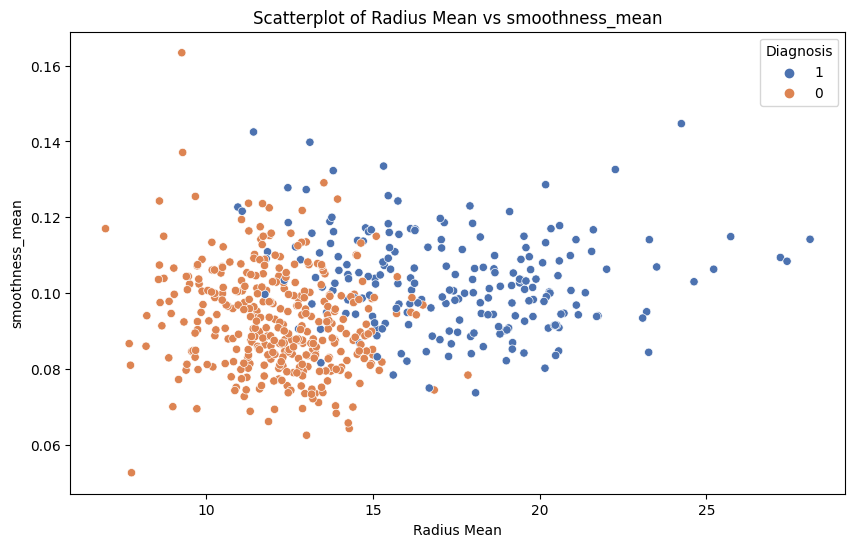

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Data_cleaned["radius_mean"], y=Data_cleaned["smoothness_mean"], hue=Diagnosis_cleaned, palette="deep")
# Achsenbeschriftungen und Titel
plt.title('Scatterplot of Radius Mean vs smoothness_mean')
plt.xlabel('Radius Mean')
plt.ylabel('smoothness_mean')

# Legende hinzufügen
plt.legend(title='Diagnosis')
plt.savefig("Test1")